In [16]:
import numpy as np
import scipy.stats as sps
import subprocess
import matplotlib.pyplot as plt
from tqdm import tqdm

В файле main_1.cpp происходит тестирование, в main_2.cpp сжатие из input.txt

In [36]:
N = 1000000
probs = [1.0, 0.85, 0.65] + [0.5 ** pow for pow in range(1, 25)]
fracs = []
for p in tqdm(probs):
    data = sps.geom(p=p).rvs(size=N)
    with open('input.txt', 'w') as f:
        f.writelines(["{}\n".format(str(n)) for n in data])
    fracs.append(float(subprocess.Popen("./varint", stdout=subprocess.PIPE,
                                        cwd="/home/ya-philya/GitHub/Info-Search-Course/varint",
                                        universal_newlines=True).communicate()[0]))

100%|██████████| 27/27 [00:25<00:00,  1.02s/it]


In [37]:
fracs

[8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.99773,
 7.86083,
 7.04743,
 5.84172,
 4.97535,
 4.49322,
 4.24722,
 4.12319,
 4.02412,
 3.77211,
 3.39039,
 3.07349,
 2.87997,
 2.77677,
 2.72186,
 2.67805,
 2.56438,
 2.38059,
 2.22067,
 2.11827,
 2.06089]

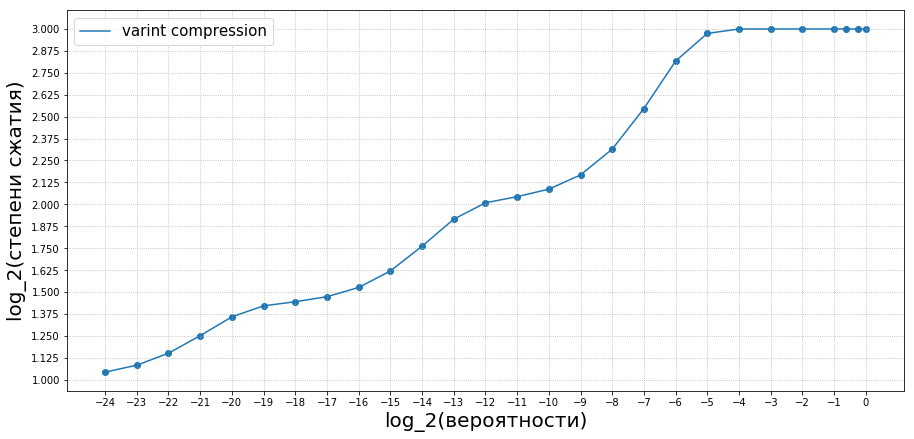

In [40]:
plt.figure(figsize=(15, 7))
plt.scatter(np.log2(probs), np.log2(fracs))
plt.plot(np.log2(probs), np.log2(fracs), label='varint compression')
plt.xlabel('log_2(вероятности)', fontsize=20)
plt.ylabel('log_2(степени сжатия)', fontsize=20)
plt.xticks(np.arange(-24, 0.001, 1))
plt.yticks(np.arange(1.0, 3.001, 0.125))
plt.legend(fontsize=15)
plt.grid(ls=':')
plt.show()